<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone Project: Predicting Fentanyl Presence In <br> Accidental Drug Overdose Deaths In Connecticut, USA

### Contents:
#### Part 4 (of 5)
- Keywords
- Background
- Problem Statement
- Target Audience
- Objectives
- Data Wrangling
- Exploration & Visualisation
- [Pre-Processing & Modelling](#Pre-Processing-&-Modelling)
- Results & Discussion
- Recommendations
- Conclusion
- References

## Pre-Processing & Modelling

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

pd.set_option('display.max.columns', None)
pd.set_option('display.max.colwidth', 100)

### Import DataFrame

In [2]:
# read in dataset
df = pd.read_csv('../data/accidental_drug_related_deaths_2012_2020_clean.csv')

### Glimpse DataFrame

In [3]:
# check out dataset
df.head()

,Date,Age,Sex,Race,Death_County,Death_City,Death_City_Geo,Death_Place,Injury_Place,Fentanyl,Any_Fentanyl_Analogue,Buprenorphine,Methadone,Oxymorphone,Hydromorphone,Oxycodone,Hydrocodone,Heroin,Morphine_Not_Heroin,Tramadol,Codeine,Ethanol,Cocaine,Xylazine,Phencyclidine,Any_Benzodiazepine,Any_Amphetamine,Other_Drug,Any_Opioid,Other_Opioid,Covid_Pandemic,Num_Drugs,Num_Conditions
0,2012-01-01,35,Male,White,TOLLAND,HEBRON,"HEBRON, CT\n(41.658069, -72.366324)",Residence,Residence,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,Y,N,N,2,0
1,2012-01-03,41,Male,White,HARTFORD,BRISTOL,"BRISTOL, CT\n(41.673037, -72.945791)",Hospital,Residence,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,Y,N,N,1,0
2,2012-01-04,61,Male,Black,FAIRFIELD,DANBURY,"DANBURY, CT\n(41.393666, -73.451539)",Hospital,Other,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,1,0
3,2012-01-05,51,Male,White,FAIRFIELD,BRIDGEPORT,"BRIDGEPORT, CT\n(41.179195, -73.189476)",Other,Residence,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,1,0
4,2012-01-07,45,Male,White,HARTFORD,HARTFORD,"HARTFORD, CT\n(41.765775, -72.673356)",Residence,Residence,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,1,0


### Feature Selection

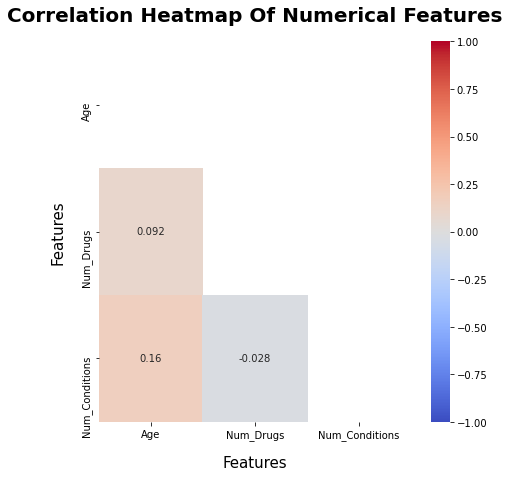

In [4]:
# visualise heatmap for all numerical features to check for multicollinearity

plt.figure(figsize=(7, 7))

numerical_features = df.select_dtypes('number')

mask = np.zeros_like(numerical_features.corr())
mask[np.triu_indices_from(mask)] = True

hm = sns.heatmap(numerical_features.corr(), annot=True, annot_kws={'size': 10}, 
                 vmin=-1, vmax=1, cmap='coolwarm', mask=mask)

plt.title('Correlation Heatmap Of Numerical Features', pad=20, fontweight='bold', fontsize=20)
plt.ylabel('Features', labelpad=15, size=15)
plt.xlabel('Features', labelpad=15, size=15)

hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize=10)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize=10)

plt.show()

**Interpretation:** There is no multicollinearity between numerical features. All numerical features shall be retained.

### Set Up Environment

In [5]:
# define features to be ignored
ignore_features = ['Date', 'Death_City', 'Death_City_Geo', 'Injury_Place', 
                   'Any_Fentanyl_Analogue', 'Buprenorphine', 'Methadone', 
                   'Oxymorphone', 'Hydromorphone', 'Oxycodone', 'Hydrocodone', 
                   'Morphine_Not_Heroin', 'Tramadol', 'Codeine', 
                   'Xylazine', 'Phencyclidine', 
                   'Any_Amphetamine', 'Other_Drug', 'Any_Opioid', 'Other_Opioid']

# define categorical features
categorical_features = ['Sex', 'Race', 'Death_County', 'Death_Place', 'Covid_Pandemic', 
                        'Heroin', 'Ethanol', 'Cocaine', 'Any_Benzodiazepine']

# define numerical features
numeric_features = ['Age', 'Num_Drugs', 'Num_Conditions']

In [6]:
# create pre-processing pipeline

# execute following pre-processing steps:
# - specify data: df
# - define target: Fentanyl
# - define features to be ignored (given above)
# - define categorical features (given above)
# - define numeric features (given above)
# - one hot encode categorical features (done automatically)
#   - by default, it will drop the first category in features with 2 categories
#   - features with 1 or more than 2 categories are left intact
# - train test split: train size=0.7 [default] (thus test size=0.3)
# - scale features: True
# - specify method of scaling features: standard aka z-score [default]
# - state number of folds to be used in cross validation: 5
# - specify choice of cross validation strategy: k-fold [default]
# - set a session id for reproducibility of experiment: 123

from pycaret.classification import *

exp_reg = setup(data=df, 
                target='Fentanyl', 
                ignore_features=ignore_features, 
                categorical_features=categorical_features, 
                numeric_features=numeric_features, 
                train_size=0.7, 
                normalize=True, normalize_method='zscore', 
                fold=5, fold_strategy='kfold',  
                # feature_selection=True, feature_selection_threshold=0.8, 
                # ignore_low_variance=True, 
                # remove_multicollinearity=True, multicollinearity_threshold=0.9, 
                # profile=True, 
                # verbose=False,  
                # silent=True, 
                session_id=123)

,Description,Value
0,session_id,123
1,Target,Fentanyl
2,Target Type,Binary
3,Label Encoded,"N: 0, Y: 1"
4,Original Data,"(7646, 33)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
# check out pre-processed X dataset
pycaret.classification.get_config('X').head()

,Age,Num_Drugs,Num_Conditions,Sex_Female,Race_Asian,Race_Black,Race_Hispanic,Race_Rest,Race_White,Death_County_FAIRFIELD,...,Death_Place_Other,Death_Place_Park/Street,Death_Place_Residence,Death_Place_Unknown,Death_Place_Vehicle/Parking Lot,Heroin_Y,Ethanol_N,Cocaine_N,Any_Benzodiazepine_N,Covid_Pandemic_N
0,-0.611543,-0.529400,-0.269661,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
1,-0.131047,-1.145748,-0.269661,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,1.470606,-1.145748,-0.269661,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.669780,-1.145748,-0.269661,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.189284,-1.145748,-0.269661,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [8]:
# check out shapes of pre-processed X dataset, X_train dataset, and X_test dataset
print('X Dataset Shape:', pycaret.classification.get_config('X').shape)
print('X_train Dataset Shape:', pycaret.classification.get_config('X_train').shape)
print('X_test Dataset Shape:', pycaret.classification.get_config('X_test').shape)

X Dataset Shape: (7646, 29)
X_train Dataset Shape: (5352, 29)
X_test Dataset Shape: (2294, 29)


### Compare Models

In [9]:
# remove unneeded performance evaluation metrics
remove_metric('kappa')
remove_metric('mcc')

In [10]:
# compare models using their default hyperparameters
# evaluate performance of all models using cross validation on train dataset
# the output is a score grid with average cross validated scores for all models sorted in descending order of accuracy
# return top three models from this performance evaluation
top_models = compare_models(n_select=3, sort='Accuracy')
top_models

,Model,Accuracy,AUC,Recall,Prec.,F1,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7820,0.8479,0.8645,0.7779,0.8187,0.9620
gbc,Gradient Boosting Classifier,0.7786,0.8429,0.8774,0.7677,0.8187,0.2520
xgboost,Extreme Gradient Boosting,0.7745,0.8402,0.8454,0.7783,0.8103,1.4980
rf,Random Forest Classifier,0.7521,0.8109,0.8281,0.7594,0.7920,0.4560
et,Extra Trees Classifier,0.7311,0.7745,0.7918,0.7506,0.7705,0.4860
lr,Logistic Regression,0.7274,0.7818,0.7892,0.7474,0.7674,1.2900
ridge,Ridge Classifier,0.7246,0.0000,0.7853,0.7457,0.7648,0.0120
lda,Linear Discriminant Analysis,0.7237,0.7788,0.7833,0.7455,0.7637,0.0300
ada,Ada Boost Classifier,0.7186,0.7855,0.7765,0.7424,0.7588,0.1380
svm,SVM - Linear Kernel,0.7156,0.0000,0.8553,0.7108,0.7743,0.0300


[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
            

In [11]:
# compare models using their default hyperparameters
# evaluate performance of all models on test dataset
# the output is a score grid with test scores for all models sorted in descending order of accuracy
# return top three models from this performance evaluation
top_models = compare_models(n_select=3, sort='Accuracy', cross_validation=False)
top_models

,Model,Accuracy,AUC,Recall,Prec.,F1,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7899,0.8538,0.8751,0.7817,0.8257,0.1300
gbc,Gradient Boosting Classifier,0.7847,0.8456,0.8789,0.7734,0.8228,0.6400
xgboost,Extreme Gradient Boosting,0.7781,0.8391,0.8444,0.7827,0.8124,1.8400
rf,Random Forest Classifier,0.7585,0.8176,0.8276,0.7665,0.7959,0.6400
lr,Logistic Regression,0.7328,0.7817,0.7862,0.7544,0.7700,0.2100
lda,Linear Discriminant Analysis,0.7328,0.7785,0.7900,0.7526,0.7708,0.0500
et,Extra Trees Classifier,0.7328,0.7782,0.7923,0.7515,0.7714,0.5900
ridge,Ridge Classifier,0.7323,0.7229,0.7916,0.7513,0.7709,0.0100
ada,Ada Boost Classifier,0.7280,0.7926,0.7870,0.7480,0.7670,0.2400
dt,Decision Tree Classifier,0.7110,0.7114,0.7372,0.7504,0.7437,0.0300


[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
            

**Verdict:**

From the PyCaret library, fourteen classification models were compared based on their performance on the:
- Train dataset (using cross validation: fit on train fold → score on validation fold → repeat for k folds → compute mean score)
- Test dataset (fit on train dataset → score on test dataset)

On the train dataset, the top three models with the best accuracy score were (in descending order): 
1. Light Gradient Boosting Machine Classifier
2. Gradient Boosting Classifier
3. Extreme Gradient Boosting Classifier

On the test dataset, the top three models with the best accuracy score were (in descending order): 
1. Light Gradient Boosting Machine Classifier
2. Gradient Boosting Classifier
3. Extreme Gradient Boosting Classifier

As such, the three models that will be shortlisted for hyperparameter tuning and further evaluation are: 
- Light Gradient Boosting Machine Classifier
- Gradient Boosting Classifier
- Extreme Gradient Boosting Classifier

### Create, Tune, & Predict Models

#### Model 1: Light Gradient Boosting Machine Classifier

In [12]:
# create model with default hyperparameters
# evaluate performance of default model using cross validation on train dataset
# the output is a score grid with cross validated scores by fold of default model
lightgbm = create_model('lightgbm')
lightgbm

,Accuracy,AUC,Recall,Prec.,F1
0,0.7946,0.8662,0.8621,0.8035,0.8318
1,0.7684,0.8442,0.8361,0.7751,0.8044
2,0.7654,0.8326,0.8514,0.7556,0.8006
3,0.7935,0.8590,0.9007,0.7676,0.8288
4,0.7879,0.8376,0.8722,0.7879,0.8279
Mean,0.7820,0.8479,0.8645,0.7779,0.8187
SD,0.0125,0.0127,0.0217,0.0165,0.0133


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [13]:
# predict and evaluate default model on test dataset
predict_model(lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1
0,Light Gradient Boosting Machine,0.7899,0.8538,0.8751,0.7817,0.8257


In [14]:
# tune model by doing a randomised grid search of hyperparameters on a pre-defined search space
# the function will search 10 random combinations for the hyperparameters that result in the best accuracy
# evaluate performance of tuned model using cross validation on train dataset
# the output is a score grid with cross validated scores by fold of tuned model
# return best hyperparameters found for this model
tuned_lightgbm = tune_model(lightgbm, n_iter=10, optimize='Accuracy')
tuned_lightgbm

,Accuracy,AUC,Recall,Prec.,F1
0,0.7880,0.8519,0.8590,0.7971,0.8268
1,0.7750,0.8377,0.8508,0.7758,0.8116
2,0.7579,0.8225,0.8345,0.7542,0.7923
3,0.7720,0.8411,0.8754,0.7536,0.8100
4,0.7692,0.8267,0.8482,0.7775,0.8113
Mean,0.7724,0.8360,0.8536,0.7716,0.8104
SD,0.0097,0.0105,0.0135,0.0163,0.0110


LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
# predict and evaluate tuned model on test dataset
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1
0,Light Gradient Boosting Machine,0.7746,0.8411,0.8559,0.7725,0.8121


In [16]:
# tune model by doing a randomised grid search of hyperparameters on a custom-specified search space
# the function will search 10 random combinations for the hyperparameters that result in the best accuracy
# evaluate performance of custom model using cross validation on train dataset
# the output is a score grid with cross validated scores by fold of custom model
# return best hyperparameters found for this model
custom_grid = {'n_estimators': [100, 500, 1000], 
               'learning_rate': [0.01, 0.01, 0.1], 
               'max_depth': [3, 5, 7], 
               'subsample': [0.8, 0.9, 1], 
               'colsample_bytree': [0.8, 0.9, 1], 
               'objective': ['binary']}

custom_lightgbm = tune_model(lightgbm, n_iter=10, optimize='Accuracy', custom_grid=custom_grid)
custom_lightgbm

,Accuracy,AUC,Recall,Prec.,F1
0,0.8011,0.8706,0.8827,0.8003,0.8395
1,0.7965,0.8529,0.8787,0.7882,0.8310
2,0.7738,0.8338,0.8598,0.7620,0.8079
3,0.8009,0.8678,0.9091,0.7725,0.8353
4,0.7916,0.8416,0.8866,0.7850,0.8327
Mean,0.7928,0.8533,0.8834,0.7816,0.8293
SD,0.0101,0.0144,0.0158,0.0132,0.0110


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learning_rate=0.01, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1, subsample_for_bin=200000, subsample_freq=0)

In [17]:
# predict and evaluate custom model on test dataset
predict_model(custom_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1
0,Light Gradient Boosting Machine,0.7908,0.8563,0.8797,0.7804,0.8271


#### Model 2: Gradient Boosting Classifier

In [18]:
# create model with default hyperparameters
# evaluate performance of default model using cross validation on train dataset
# the output is a score grid with cross validated scores by fold of default model
gbc = create_model('gbc')
gbc

,Accuracy,AUC,Recall,Prec.,F1
0,0.7946,0.8568,0.8796,0.7940,0.8346
1,0.7759,0.8410,0.8721,0.7666,0.8160
2,0.7636,0.8271,0.8581,0.7504,0.8006
3,0.7916,0.8576,0.9192,0.7573,0.8304
4,0.7673,0.8321,0.8578,0.7704,0.8118
Mean,0.7786,0.8429,0.8774,0.7677,0.8187
SD,0.0125,0.0125,0.0225,0.0149,0.0124


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [19]:
# predict and evaluate default model on test dataset
predict_model(gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1
0,Gradient Boosting Classifier,0.7847,0.8456,0.8789,0.7734,0.8228


In [20]:
# tune model by doing a randomised grid search of hyperparameters on a pre-defined search space
# the function will search 10 random combinations for the hyperparameters that result in the best accuracy
# evaluate performance of tuned model using cross validation on train dataset
# the output is a score grid with cross validated scores by fold of tuned model
# return best hyperparameters found for this model
tuned_gbc = tune_model(gbc, n_iter=10, optimize='Accuracy')
tuned_gbc

,Accuracy,AUC,Recall,Prec.,F1
0,0.7871,0.8488,0.8431,0.8048,0.8235
1,0.7554,0.8215,0.8066,0.7736,0.7897
2,0.7654,0.8240,0.8547,0.7541,0.8013
3,0.7766,0.8401,0.8822,0.7561,0.8143
4,0.7720,0.8284,0.8546,0.7776,0.8143
Mean,0.7713,0.8325,0.8482,0.7733,0.8086
SD,0.0107,0.0103,0.0245,0.0183,0.0118


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
# predict and evaluate tuned model on test dataset
predict_model(tuned_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1
0,Gradient Boosting Classifier,0.7781,0.8420,0.8483,0.7807,0.8131


In [22]:
# tune model by doing a randomised grid search of hyperparameters on a custom-specified search space
# the function will search 10 random combinations for the hyperparameters that result in the best accuracy
# evaluate performance of custom model using cross validation on train dataset
# the output is a score grid with cross validated scores by fold of custom model
# return best hyperparameters found for this model
custom_grid = {'n_estimators': [100, 500, 1000], 
               'learning_rate': [0.01, 0.01, 0.1], 
               'max_depth': [3, 5, 7], 
               'min_samples_split': [2, 4, 6], 
               'min_samples_leaf': [1, 3, 5], 
               'ccp_alpha': [0, 1, 5]}

custom_gbc = tune_model(gbc, n_iter=10, optimize='Accuracy', custom_grid=custom_grid)
custom_gbc

,Accuracy,AUC,Recall,Prec.,F1
0,0.8002,0.8562,0.8891,0.7957,0.8398
1,0.7759,0.8403,0.8721,0.7666,0.8160
2,0.7607,0.8250,0.8632,0.7449,0.7997
3,0.7925,0.8564,0.9141,0.7605,0.8303
4,0.7701,0.8331,0.8674,0.7691,0.8153
Mean,0.7799,0.8422,0.8812,0.7674,0.8202
SD,0.0145,0.0125,0.0187,0.0165,0.0138


GradientBoostingClassifier(ccp_alpha=0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [23]:
# predict and evaluate custom model on test dataset
predict_model(custom_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1
0,Gradient Boosting Classifier,0.7794,0.8453,0.8812,0.7662,0.8197


#### Model 3: Extreme Gradient Boosting Classifier

In [24]:
# create model with default hyperparameters
# evaluate performance of default model using cross validation on train dataset
# the output is a score grid with cross validated scores by fold of default model
xgboost = create_model('xgboost')
xgboost

,Accuracy,AUC,Recall,Prec.,F1
0,0.7834,0.8575,0.8494,0.7964,0.8221
1,0.7694,0.8331,0.8180,0.7858,0.8016
2,0.7589,0.8332,0.8311,0.7569,0.7923
3,0.7841,0.8475,0.8788,0.7665,0.8188
4,0.7766,0.8296,0.8498,0.7858,0.8166
Mean,0.7745,0.8402,0.8454,0.7783,0.8103
SD,0.0094,0.0106,0.0205,0.0144,0.0114


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [25]:
# predict and evaluate default model on test dataset
predict_model(xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1
0,Extreme Gradient Boosting,0.7781,0.8391,0.8444,0.7827,0.8124


In [26]:
# tune model by doing a randomised grid search of hyperparameters on a pre-defined search space
# the function will search 10 random combinations for the hyperparameters that result in the best accuracy
# evaluate performance of tuned model using cross validation on train dataset
# the output is a score grid with cross validated scores by fold of tuned model
# return best hyperparameters found for this model
tuned_xgboost = tune_model(xgboost, n_iter=10, optimize='Accuracy')
tuned_xgboost

,Accuracy,AUC,Recall,Prec.,F1
0,0.7778,0.8475,0.9762,0.7342,0.8381
1,0.7554,0.8219,0.9656,0.7096,0.8181
2,0.7486,0.8223,0.9493,0.7016,0.8069
3,0.7570,0.8399,0.9747,0.7027,0.8166
4,0.7458,0.8227,0.9473,0.7127,0.8134
Mean,0.7569,0.8309,0.9626,0.7122,0.8186
SD,0.0112,0.0108,0.0123,0.0118,0.0105


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=290, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=2,
              reg_lambda=0.7, scale_pos_weight=37.1, subsample=0.7,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)

In [27]:
# predict and evaluate tuned model on test dataset
predict_model(tuned_xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1
0,Extreme Gradient Boosting,0.7677,0.8363,0.9586,0.7231,0.8244


In [28]:
# tune model by doing a randomised grid search of hyperparameters on a custom-specified search space
# the function will search 10 random combinations for the hyperparameters that result in the best accuracy
# evaluate performance of custom model using cross validation on train dataset
# the output is a score grid with cross validated scores by fold of custom model
# return best hyperparameters found for this model
custom_grid = {'n_estimators': [100, 500, 1000], 
               'learning_rate': [0.01, 0.01, 0.1], 
               'max_depth': [3, 5, 7], 
               'subsample': [0.8, 0.9, 1], 
               'colsample_bytree': [0.8, 0.9, 1], 
               'gamma': [0, 1, 5]}

custom_xgboost = tune_model(xgboost, n_iter=10, optimize='Accuracy', custom_grid=custom_grid)
custom_xgboost

,Accuracy,AUC,Recall,Prec.,F1
0,0.8058,0.8700,0.8922,0.8009,0.8441
1,0.7908,0.8569,0.8754,0.7830,0.8266
2,0.7748,0.8343,0.8615,0.7623,0.8089
3,0.8075,0.8658,0.9175,0.7764,0.8410
4,0.7860,0.8417,0.8834,0.7800,0.8285
Mean,0.7930,0.8538,0.8860,0.7805,0.8298
SD,0.0123,0.0137,0.0187,0.0124,0.0125


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [29]:
# predict and evaluate custom model on test dataset
predict_model(custom_xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1
0,Extreme Gradient Boosting,0.7895,0.8555,0.8843,0.7766,0.8269


**Verdict:**

Scores

| No | Model | Train CV Accuracy | Test Accuracy | Accuracy Difference | Train CV AUC | Test AUC | AUC Difference |
|:---|:---|:---|:---|:---|:---|:---|:---|
| 1 | Default LGBMC | 0.7820 | 0.7899 | +0.0079 | 0.8479 | 0.8538 | +0.0059 |
|  | Tuned LGBMC | 0.7724 | 0.7746 | +0.0022 | 0.8360 | 0.8411 | +0.0051 |
|  | Custom LGBMC | 0.7928 | 0.7908 | -0.0020 | 0.8533 | 0.8563 | +0.0030 |
| 2 | Default GBC | 0.7786 | 0.7847 | +0.0061 | 0.8429 | 0.8456 | +0.0027 |
|  | Tuned GBC | 0.7713 | 0.7781 | +0.0068 | 0.8325 | 0.8420 | +0.0095 |
|  | Custom GBC | 0.7799 | 0.7794 | -0.0005 | 0.8422 | 0.8453 | +0.0031 |
| 3 | Default XGBC | 0.7745 | 0.7781 | +0.0036 | 0.8402 | 0.8391 | -0.0011 |
|  | Tuned XGBC | 0.7569 | 0.7677 | +0.0108 | 0.8309 | 0.8363 | +0.0054 |
|  | Custom XGBC | 0.7930 | 0.7895 | -0.0035 | 0.8538 | 0.8555 | +0.0017 |

Acronyms

> - CV: Cross Validation
> - AUC: Area Under Curve
> - LGBMC: Light Gradient Boosting Machine Classifier
> - GBC: Gradient Boosting Classifier
> - XGBC: Extreme Gradient Boosting Classifier

Metrics

> Accuracy is a metric that ranges from 0 to 1. The closer it is to 1, the better. <br>It measures how many correct predictions the model made out of all the data points.

> AUC is a metric that ranges from 0.5 to 1. The closer it is to 1, the better. <br>It quantifies how well separated the underlying prediction distributions made by the model are.

Discussion

> From the comparison stage, three models (LGBMC, GBC, XGBC) had been shortlisted. For each model, three versions (Default, Tuned, Custom) of itself were constructed. The Default model is the unoptimised, basic version of the model on its default hyperparameters. The Tuned model is the model that has been optimised through a randomised grid search on a pre-defined search space. The Custom model is the model that has been optimised through a randomised grid search on a custom-specified search space. All in all, nine variations of the three models were evaluated. 

> Among the nine variations, the Custom LGBMC performed the best overall. It achieved the highest test accuracy (0.7908) and highest test AUC (0.8563). It also attained the second highest train CV accuracy (0.7928) and second highest train CV AUC (0.8533). Although its test accuracy was lower than its train CV accuracy (-0.0020), which would suggest some over-fitting, its test AUC was higher than its train CV AUC (+0.0030), which would suggest otherwise. The Custom LGBMC will be selected as the model of choice for further plot visualisations.

### Plot & Evaluate Model

In [30]:
# display hyperparameters of tuned model
plot_model(custom_lightgbm, plot='parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,0.8
importance_type,split
learning_rate,0.01
max_depth,5
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,1000


In [31]:
# assign the pre-processed datasets accordingly
X = pycaret.classification.get_config('X')
X_train = pycaret.classification.get_config('X_train')
X_test = pycaret.classification.get_config('X_test')
y = pycaret.classification.get_config('y')
y_train = pycaret.classification.get_config('y_train')
y_test = pycaret.classification.get_config('y_test')

In [32]:
# use trained tuned model to make predictions on test dataset
predicted_prob_y_test = custom_lightgbm.predict_proba(X_test)
predicted_y_test = custom_lightgbm.predict(X_test)

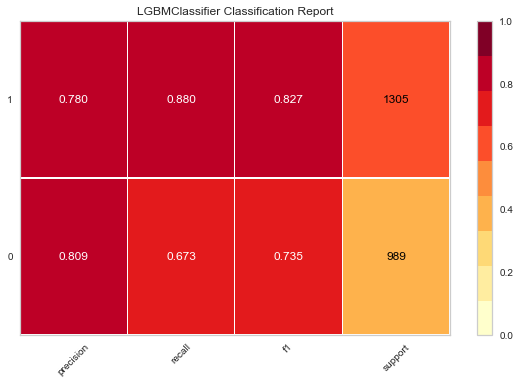

In [33]:
# plot classification report of trained tuned model on test dataset
plot_model(custom_lightgbm, plot='class_report')

**Interpretation:** The Custom LGBMC got a higher precision score predicting non-fentanyl deaths as compared to fentanyl deaths but a higher recall score, f1 score, and support score predicting fentanyl deaths as compared to non-fentanyl deaths.

In [34]:
# print classification report
print('Classification Report:')
print(metrics.classification_report(y_test, predicted_y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.67      0.74       989
           1       0.78      0.88      0.83      1305

    accuracy                           0.79      2294
   macro avg       0.79      0.78      0.78      2294
weighted avg       0.79      0.79      0.79      2294



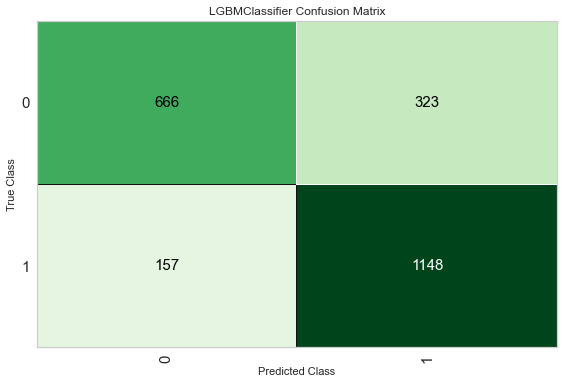

In [35]:
# plot confusion matrix of trained tuned model on test dataset
plot_model(custom_lightgbm, plot='confusion_matrix')

**Interpretation:** The Custom LGBMC was able to accurately predict 666 (true negatives) out of 989 (actual negatives) non-fentanyl deaths and 1148 (true positives) out of 1305 (actual positives) fentanyl deaths in the test dataset. This corresponds to a test accuracy of 0.7908. In other words, 79.08% of accidental drug overdose deaths were accurately predicted by the Custom LGBMC to have either no fentanyl present or fentanyl present.

In [36]:
# print confusion matrix
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, predicted_y_test))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted_y_test).ravel()
print()
print('True Negatives:', tn)
print('False Positives:', fp)
print('False Negatives:', fn)
print('True Positives:', tp)

Confusion Matrix:
[[ 666  323]
 [ 157 1148]]

True Negatives: 666
False Positives: 323
False Negatives: 157
True Positives: 1148


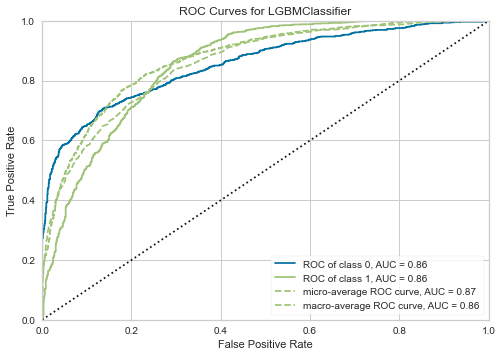

In [37]:
# plot roc curve of trained tuned model on test dataset
plot_model(custom_lightgbm, plot='auc')

**Interpretation:** The Custom LBGMC obtained a test AUC of 0.8563.

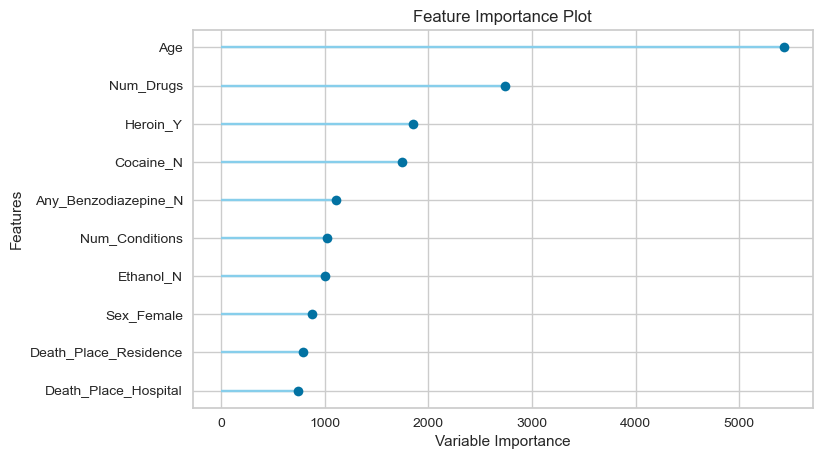

In [38]:
# plot top ten feature importances of trained tuned model
plot_model(custom_lightgbm, plot='feature')

**Interpretation:** 

The most important feature that predicts fentanyl presence is the age at which the victim died. Based on insights from data exploration and visualisation, it is known that fentanyl users tend to have a shorter life expectancy and lived shorter lives on average than non-fentanyl users. This comes as no surprise owing to fentanyl's high potency and the relative ease with which its users may suffer from an accidental overdose with just a tiny amount.

The second most important feature that explains fentanyl presence is the number of drugs in the victim at the point of death. Based on insights from data exploration and visualisation, it is known that fentanyl users would more often mix fentanyl with one or two drugs than take fentanyl alone, which causes them to overdose on more drugs on average than non-fentanyl users. This is supported by toxicology findings in autopsy reports that indicate how fentanyl use is closely associated with polydrug use.

The third most important feature that influences fentanyl presence is the involvement of heroin in the death of the victim. Based on insights from data exploration and visualisation, it is known that out of all the possible fentanyl-drug combinations, a fentanyl-heroin combination is responsible for the most number of deaths. This is because they are both fast-acting, highly-potent, extremely-addictive opioids that produce similar effects - both act as central nervous system depressants - meaning that in increasing doses, they can cause drowsiness, sedation, respiratory depression, coma, and eventually death. Heroin's presence is so intertwined with fentanyl's presence because, as fentanyl is more potent and cheaper than heroin, mixing fentanyl into heroin will allow manufacturers to get more profitability from a batch.

In [39]:
# display top ten feature importances of trained tuned model
pd.DataFrame({'Feature': X.columns, 
              'Importance': custom_lightgbm.feature_importances_}).sort_values('Importance', ascending=False).head(10)

,Feature,Importance
0,Age,5437
1,Num_Drugs,2739
24,Heroin_Y,1853
26,Cocaine_N,1746
27,Any_Benzodiazepine_N,1108
2,Num_Conditions,1024
25,Ethanol_N,1000
3,Sex_Female,883
21,Death_Place_Residence,788
17,Death_Place_Hospital,745


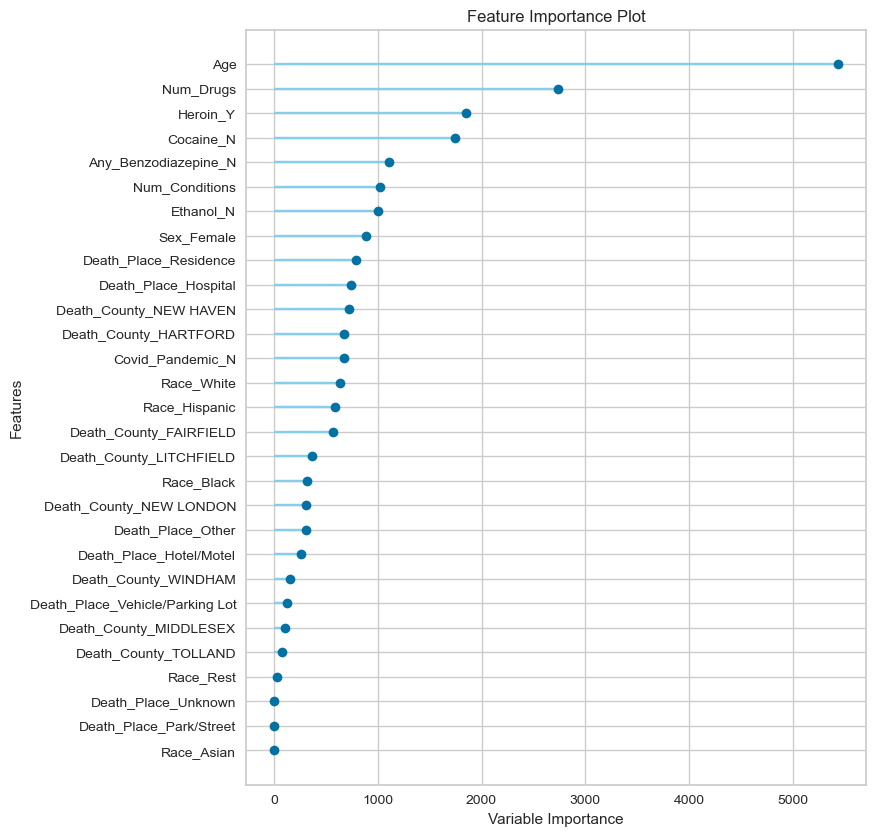

In [40]:
# plot all feature importances of trained tuned model
plot_model(custom_lightgbm, plot='feature_all')

**Interpretation:** 

Surprisngly, sex did not emerge as one of the top three most important features. It is the eighth most important feature here. Based on insights from data exploration and visualisation, it has been shown that while the number of fentanyl deaths and non-fentanyl deaths in females are comparable, the number of fentanyl deaths far outnumbers that of non-fentanyl deaths in males. Although, fentanyl use is more predominant in males than in females, it has not been deemed by the model to be a high-importance feature in predicing fentanyl presence.

Interestingly, Covid-19 did not surface as one of the top ten most important features. It is the thirteenth most important feature here. Based on insights from data exploration and visualisation, it has been shown that fentanyl deaths outstripped non-fentanyl deaths by a bigger margin after Covid-19 was declared a pandemic as compared to before. However, it has not been deemed by the model to be a high-importance feature in predicting fentanyl presence.

In [41]:
# display all feature importances of trained tuned model
pd.DataFrame({'Feature': X.columns, 
              'Importance': custom_lightgbm.feature_importances_}).sort_values('Importance', ascending=False)

,Feature,Importance
0,Age,5437
1,Num_Drugs,2739
24,Heroin_Y,1853
26,Cocaine_N,1746
27,Any_Benzodiazepine_N,1108
2,Num_Conditions,1024
25,Ethanol_N,1000
3,Sex_Female,883
21,Death_Place_Residence,788
17,Death_Place_Hospital,745


In [42]:
# show user interface for analysing performance of trained model on test dataset
evaluate_model(custom_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Finalise Model

In [43]:
# finalise model by fitting it onto the entire dataset
final_lightgbm = finalize_model(custom_lightgbm)
final_lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learning_rate=0.01, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1, subsample_for_bin=200000, subsample_freq=0)

### Save Model

In [44]:
# save model for future deployment on unseen data
save_model(final_lightgbm, '../models/final_lightgbm_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Sex', 'Race',
                                                             'Death_County',
                                                             'Death_Place',
                                                             'Covid_Pandemic',
                                                             'Heroin', 'Ethanol',
                                                             'Cocaine',
                                                             'Any_Benzodiazepine'],
                                       display_types=True,
                                       features_todrop=['Date', 'Death_City',
                                                        'Death_City_Geo',
                                                        'Injury_Place',
                                                        'Any_Fentanyl_Analogue',
                                       

### Null Model

In [45]:
# get baseline accuracy
y.value_counts(normalize=True)

1    0.569971
0    0.430029
Name: Fentanyl, dtype: float64

**Interpretation:** The null model has a baseline accuracy of 0.5699 at predicting fentanyl presence. This is inferior compared to the model of choice, the Custom LGBMC, which was able to score a test accuracy of 0.7908. The Custom LGBMC managed to outperform the null model by a margin of 0.2209.

In [46]:
# get baseline auc
y_mean_arr = np.full(y.shape, y.mean())
metrics.roc_auc_score(y, y_mean_arr)

0.5

**Interpretation:** The null model has a baseline AUC of 0.5000 at predicting fentanyl presence. This is inferior compared to the model of choice, the Custom LGBMC, which was able to score a test AUC of 0.8563. The Custom LGBMC managed to outperform the null model by a margin of 0.3563.